# 1. Data Exploration:


In [1]:
#a. Load the dataset and perform exploratory data analysis (EDA).

import pandas as pd
data=pd.read_csv("Titanic_train.csv")


In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#b. Examine the features, their types, and summary statistics.

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

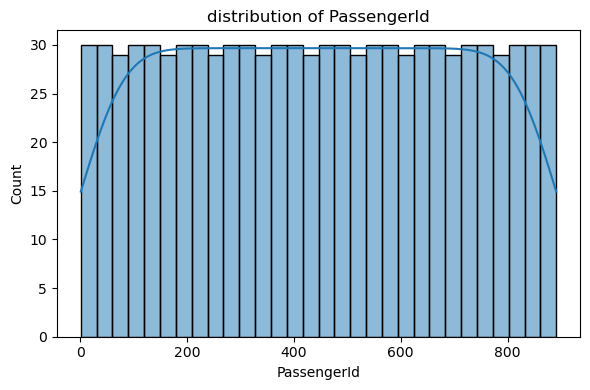

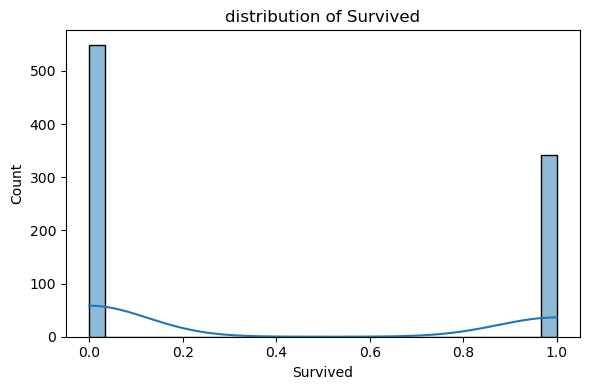

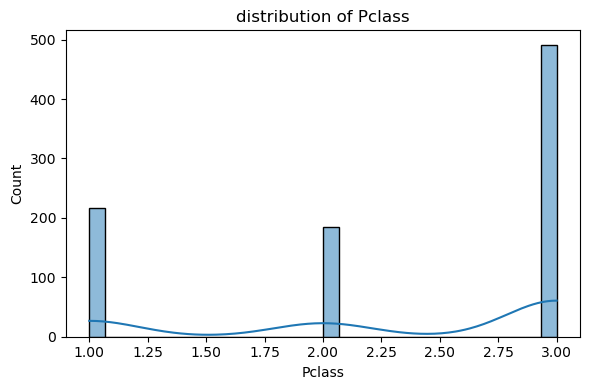

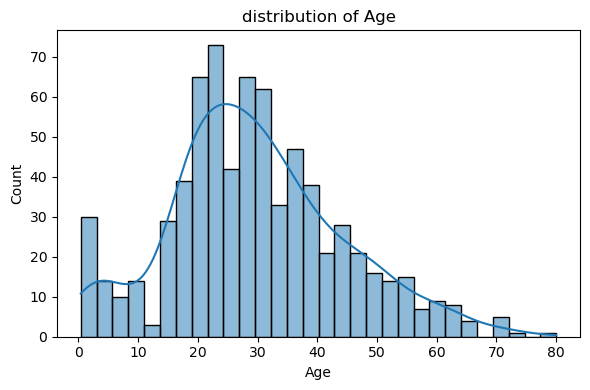

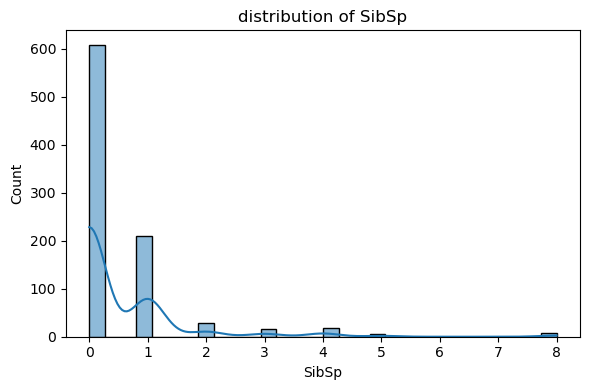

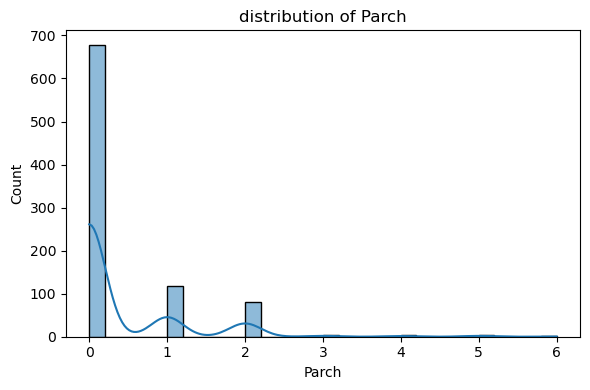

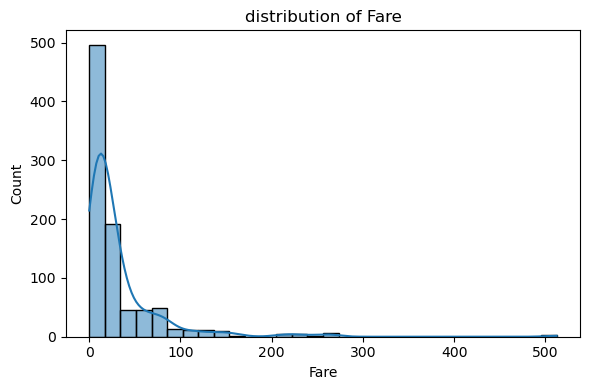

In [11]:
numeric_columns=data.select_dtypes(include=["int64","float64"]).columns
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    plt.title(f"distribution of {col}")
    sns.histplot(data[col],bins=30,kde=True)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [12]:
#From the histogram we can observe that
#The number of people survived is less than the number of not survived
#most of the people are in age of 20-40
#most of the people travelled alone that without siblings and children

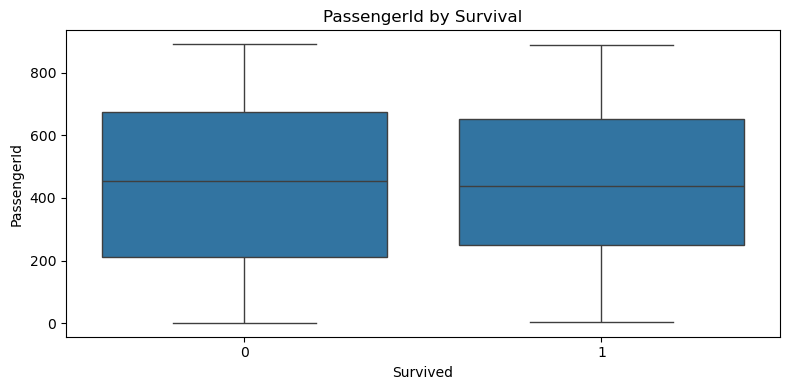

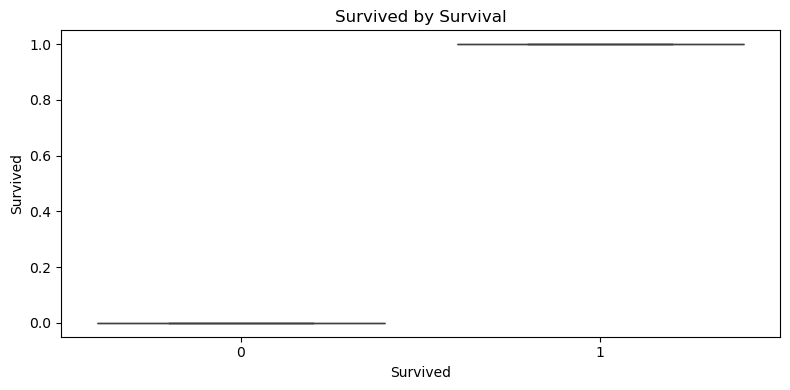

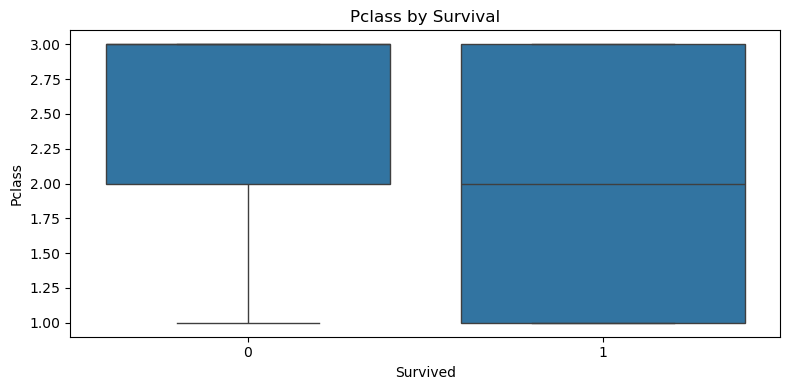

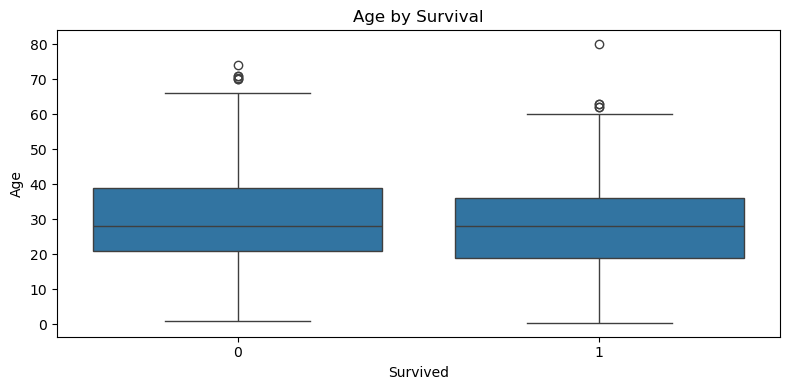

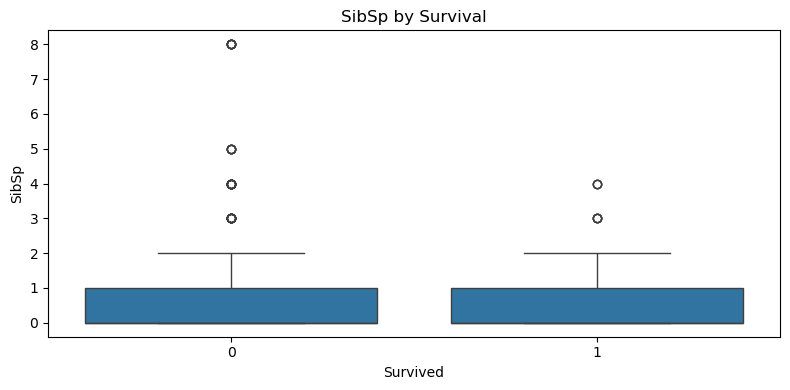

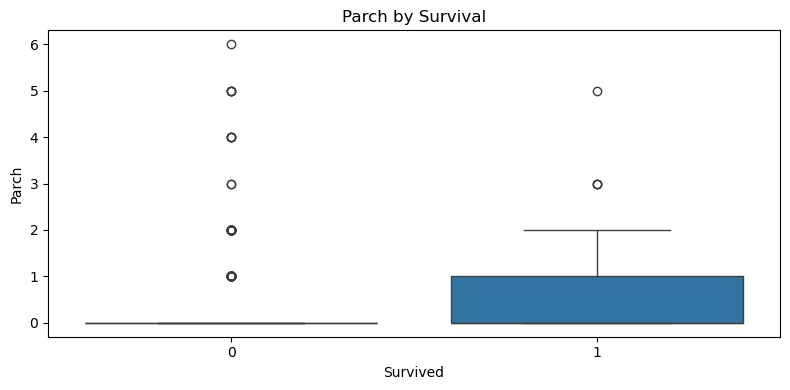

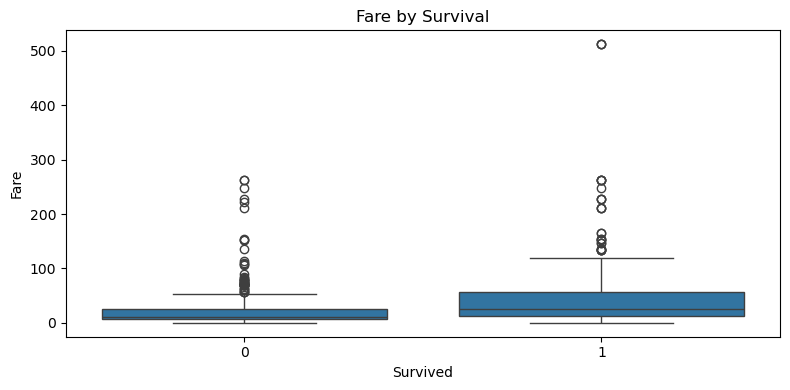

In [14]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Survived', y=col, data=data)
    plt.title(f'{col} by Survival')
    plt.xlabel('Survived')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# 2. Data Preprocessing:

In [15]:
#a. Handle missing values (e.g., imputation).
#lets check for missing values

data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
#There are missing values for age,cabin,embarked

#lets fill the missing values for age with median
#lets drop the cabin column as there is more than 50% of the data missing
#lets fill the missing values for embarked with mode

In [17]:
data.drop(columns=["Cabin"],inplace=True)
#Dropping the cabin column as there is more than 50% of the data missing


In [18]:
data.fillna({'Age': data['Age'].median()}, inplace=True)
#filling the missing values for age with median
data.fillna({'Embarked':data["Embarked"].mode()},inplace=True)
#filling the missing values for embarked with mode as its categorical

In [19]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [20]:
#Now all the data is filled and there are no null values

In [21]:
#b. Encode categorical variables.

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [22]:
#here we will encode sex and embarked and drop name and ticket as they are not required for us

In [23]:
data.drop(columns=["Name","Ticket"],inplace=True)

In [24]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [25]:
data=pd.get_dummies(data,columns=["Embarked"],drop_first=True).astype(int)

In [26]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22,1,0,7,0,1
1,2,1,1,1,38,1,0,71,0,0
2,3,1,3,1,26,0,0,7,0,1
3,4,1,1,1,35,1,0,53,0,1
4,5,0,3,0,35,0,0,8,0,1


In [27]:
# #only for notes
# # Generate dummy variables
# data = pd.get_dummies(data, columns=["Embarked"], drop_first=True)

# # Convert all boolean columns to integers (True → 1, False → 0)
# data = data.astype({col: int for col in data.columns if data[col].dtype == "bool"})


In [28]:
#now our data is ready for model building

In [29]:
#Now we are applying same encoding that we did for training data on testing data as well

In [30]:
test_data = pd.read_csv('Titanic_test.csv')

In [31]:
#dropiing and filling data as sone on test data
test_data.drop(columns=["Cabin"],inplace=True)
test_data.fillna({'Age': test_data['Age'].median()}, inplace=True)
test_data.fillna({'Embarked':test_data["Embarked"].mode()},inplace=True)

In [32]:
#Encoding the same for tset data as well

In [33]:
test_data.drop(columns=["Name","Ticket"],inplace=True)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data=pd.get_dummies(test_data,columns=["Embarked"],drop_first=True)

In [34]:
#now both of our traing and testing data is ready

# 3. Model Building:


In [36]:
# a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
x=data.drop("Survived",axis=1)
y=data["Survived"]

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_scaled,y,test_size=0.2,random_state=48)

In [45]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [49]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, roc_curve, confusion_matrix, classification_report
y_pred = model.predict(x_val)
y_proba = model.predict_proba(x_val)[:, 1]

# 2. Evaluating the metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, y_proba))

# Classification report observed and prediccted values
print("\nClassification Report:")
print(classification_report(y_val, y_pred))



Accuracy: 0.776536312849162
Precision: 0.7123287671232876
Recall: 0.7323943661971831
F1 Score: 0.7222222222222221
ROC-AUC Score: 0.8420709441836203

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       108
           1       0.71      0.73      0.72        71

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



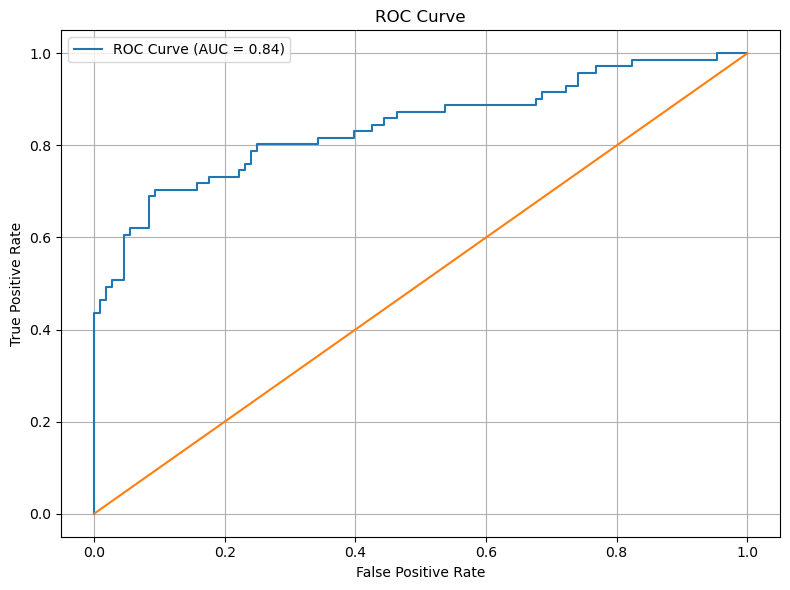

In [54]:
# 3. Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_val, y_proba):.2f})")
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [56]:
coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


       Feature  Coefficient
2          Sex     1.266299
6         Fare     0.084564
0  PassengerId     0.034315
5        Parch    -0.023648
7   Embarked_Q    -0.024460
8   Embarked_S    -0.220238
4        SibSp    -0.361504
3          Age    -0.556349
1       Pclass    -0.957526


In [57]:
import pickle
import os

# Creating a directory to save the model if it doesn't exist
os.makedirs("titanic_app/model", exist_ok=True)

# Saving the model
with open("titanic_app/model/logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Saving the scaler
with open("titanic_app/model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [58]:
#Interview Questions
#What is the difference between precision and recall

#precision gives us how accurate are our prediction
#precision = true positive/(truepsoitives + false positives)

#recall gives us how many actual positives did our model identify from the total actual positives
#recall = true positives/(true positives + false negatives)

In [59]:
#what is cross validation and its importance in binary classification

# Cross-validation is a technique used to evaluate how well your model generalizes to unseen data.

# Instead of just training your model once and testing it on a fixed test set,we can:
# Train the model on some parts, and
# test it on the remaining part — and repeat this process multiple times.


# Inference from our model

In [60]:
#Model performance

# Accuracy = 0.7765
# About 77.7% of total predictions were correct.

# Precision = 0.7123
# Of all the passengers the model predicted would survive, 71.2% actually did.

# Recall = 0.7324
# Of all passengers who actually survived, the model correctly identified 73.2%.

# F1 Score = 0.7222
# Harmonic mean of precision and recall (balance between the two).

# ROC-AUC = 0.8421
# AUC of 0.84 means excellent ability to distinguish between survival vs non-survival.


In [ ]:
#Feature Coefficients from Logistic Regression

# Sex +1.266
# Being female (likely encoded as 1) significantly increases survival chances.

# Fare +0.085
# Higher fare slightly increases survival probability.

# Pclass -0.958
# Lower class (higher number) decreases survival chances.

# Age -0.556
# Older passengers are less likely to survive.

# SibSp -0.362
# More siblings/spouses aboard reduces survival odds.

# Embarked_S -0.220
# Embarking from Southampton (S) slightly lowers survival chance.
